<a href="https://colab.research.google.com/github/GinaByte012/Project2023/blob/master/YOLOv5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

traain 할 dataset 저장.

In [46]:
%cd /content

!git clone https://github.com/GinaByte012/Project2023.git



/content
Cloning into 'Project2023'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 9 (delta 1), reused 9 (delta 1), pack-reused 0
Receiving objects: 100% (9/9), 16.50 MiB | 25.80 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [47]:
%cd Project2023

!mv /content/Project2023/train_dataset.zip /content/dataset.zip

/content/Project2023


dataset.zip 파일을 압축 해제.

In [48]:
!unzip -q /content/dataset.zip -d /content

git에서 yolov5 모델 가져옴.

In [49]:
%cd /content
!git clone https://github.com/ultralytics/yolov5.git

/content
fatal: destination path 'yolov5' already exists and is not an empty directory.


yolov5를 위한 패키지 설치

In [50]:
%cd /content/yolov5/
!pip install -r requirements.txt

/content/yolov5


데이터들을 학습용과 테스트용으로 분류하기 위한 작업

In [51]:
%cd /
from glob import glob

img_list = glob('/content/dataset/images/**', recursive=True)

print(len(img_list))

/
698


데이터를 학습용과 검증용으로 랜덤으로 분류한 후 각각의 개수 출력

In [53]:
from sklearn.model_selection import train_test_split

train_img_list, val_img_list = train_test_split(img_list, test_size=0.2, random_state=200)

print(len(train_img_list), len(val_img_list))

558 140


분류된 데이터들을 txt 파일로 저장.

In [54]:
with open('/content/dataset/train.txt', 'w') as f:
  f.write('\n'.join(train_img_list) + '\n')

with open('/content/dataset/val.txt', 'w') as f:
  f.write('\n'.join(val_img_list) + '\n')

데이터들의 경로와 클래스 정보가 저장되어있는 파일 확인

In [55]:
import yaml

# 새 파일 생성 및 텍스트 작성
data = {
    'train': '/content/dataset/train.txt',
    'val': '/content/dataset/val.txt',
    'nc': 8,
    'names': ['metal', 'plastic', 'cardboard', 'styrofoam', 'glass', 'paper', 'trash', 'plastic bag']
}

# 파일 이름 및 경로 설정
file_path = '/content/dataset/data.yaml'

# YAML 형식으로 파일에 데이터 저장
with open(file_path, 'w') as file:
    yaml.dump(data, file, default_flow_style=False)

print(f'YAML 파일 "{file_path}"이 생성되었습니다.')

YAML 파일 "/content/dataset/data.yaml"이 생성되었습니다.


In [56]:
%cat /content/dataset/data.yaml

names:
- metal
- plastic
- cardboard
- styrofoam
- glass
- paper
- trash
- plastic bag
nc: 8
train: /content/dataset/train.txt
val: /content/dataset/val.txt


YOLOv5 학습 시작.
--img: 사이즈
--batch: batch 크기
--epochs: 전체 반복 횟수
--data: data 정보 저장된 yaml 파일
--cfg: 모델 사이즈
--weights: weights
--name: 결과 이름

In [57]:
%cd /content/yolov5/

!python train.py --img 500 --batch 16 --epochs 30 --data /content/dataset/data.yaml --cfg ./models/yolov5s.yaml --weights yolov5s.pt --name garbage_yolov5s_results

/content/yolov5
train: weights=yolov5s.pt, cfg=./models/yolov5s.yaml, data=/content/dataset/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=30, batch_size=16, imgsz=500, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=garbage_yolov5s_results, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-228-g4d687c8 Python-3.10.12 torch-2.1.0+cu118 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, f

results.png에서 결과(그래프) 확인 가능
val_batch_pred.jpg에서 이미지로 결과 확인 가능

텐서보드로 학습결과 보기

In [58]:
%load_ext tensorboard
%tensorboard --logdir /content/yolov5/runs/

<IPython.core.display.Javascript object>

Detect!

In [68]:
from IPython.display import Image
import os

val_img_path = val_img_list[24]

!python detect.py --weights /content/yolov5/runs/train/garbage_yolov5s_results/weights/best.pt --img 500 --conf 0.5 --source "{val_img_path}"




detect: weights=['/content/yolov5/runs/train/garbage_yolov5s_results/weights/best.pt'], source=/content/dataset/images/paper26.jpg, data=data/coco128.yaml, imgsz=[500, 500], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-228-g4d687c8 Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 
YOLOv5s summary: 157 layers, 7031701 parameters, 0 gradients, 15.8 GFLOPs
WARNING ⚠️ --img-size [500, 500] must be multiple of max stride 32, updating to [512, 512]
image 1/1 /content/dataset/images/paper26.jpg: 384x512 (no detections), 215.6ms
Speed: 1.7ms pre-process, 215.6ms inference, 0.6ms NMS per image at shape (1, 3, 512, 512)
Results saved to runs/detect/exp4


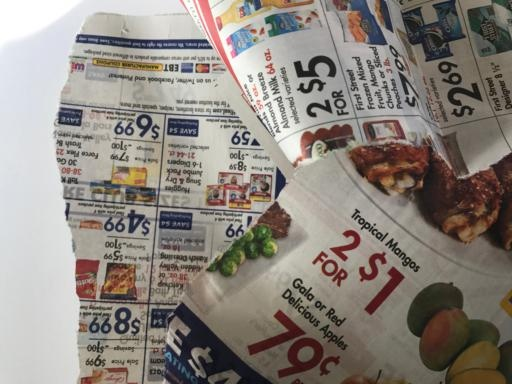

In [69]:
Image(os.path.join('/content/yolov5/runs/detect/exp4', os.path.basename(val_img_path)))